<a href="https://colab.research.google.com/github/dylanvu6868/dylanvu6868/blob/main/film_rcm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [ ]:
# Đọc dữ liệu từ file JSONL
df = pd.read_json('/content/process_data.jsonl', lines=True)

In [ ]:
df.head()

,id,title,country,genres,keywords,overview,poster_path,tagline,review,rating,type
0,617126,The Fantastic 4: First Steps,[US],"[Science Fiction, Adventure]","[strong woman, superhero, based on comic, end ...",Against the vibrant backdrop of a 1960s-inspir...,/cm8TNGBGG0aBfWj0LgrESHv8tir.jpg,Welcome to the family.,"[FULL SPOILER-FREE REVIEW ""The Fantastic Four:...",7.156,movie
1,1311031,Demon Slayer: Kimetsu no Yaiba Infinity Castle,[JP],"[Animation, Action, Fantasy, Thriller]","[supernatural, sequel, based on manga, demon, ...",The Demon Slayer Corps are drawn into the Infi...,/sUsVimPdA1l162FvdBIlmKBlWHx.jpg,It's time to have some fun.,[10 10 A Visual Masterpiece That Redefines Ani...,7.800,movie
2,941109,Play Dirty,[US],[Crime],"[heist, thief, amused]",Expert thief Parker gets a shot at a major hei...,/ovZ0zq0NwRghtWI1oLaM0lWuoEw.jpg,Even robbers get robbed.,"[FULL SPOILER-FREE REVIEW ""Play Dirty is a hug...",6.300,movie
3,1267319,Mantis,[KR],"[Action, Crime, Thriller]","[assassin, hitman, spin off, paranoid, unassum...","Mantis, an ace assassin, returns to the contra...",/xS9bbciDC5lHPgl79SrPyzxKAXL.jpg,A new generation of rising killers.,"[What do you call an action movie, with little...",6.260,movie
4,755898,War of the Worlds,[US],"[Science Fiction, Thriller]","[government, attack, privacy, surveillance, cy...",Will Radford is a top analyst for Homeland Sec...,/yvirUYrva23IudARHn3mMGVxWqM.jpg,Your data is deadly.,[Its amazing what you accomplish with a creati...,4.373,movie


**-----------------------------------------------------THỐNG KÊ TỔNG QUÁT---------------------------------------------------**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           508 non-null    int64  
 1   title        508 non-null    object 
 2   country      508 non-null    object 
 3   genres       508 non-null    object 
 4   keywords     508 non-null    object 
 5   overview     508 non-null    object 
 6   poster_path  508 non-null    object 
 7   tagline      508 non-null    object 
 8   review       508 non-null    object 
 9   rating       508 non-null    float64
 10  type         508 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 43.8+ KB


In [ ]:
df.isnull().values.any()

np.False_

In [ ]:
print(df.isna().mean().sort_values(ascending=False).head(10))

id             0.0
title          0.0
country        0.0
genres         0.0
keywords       0.0
overview       0.0
poster_path    0.0
tagline        0.0
review         0.0
rating         0.0
dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


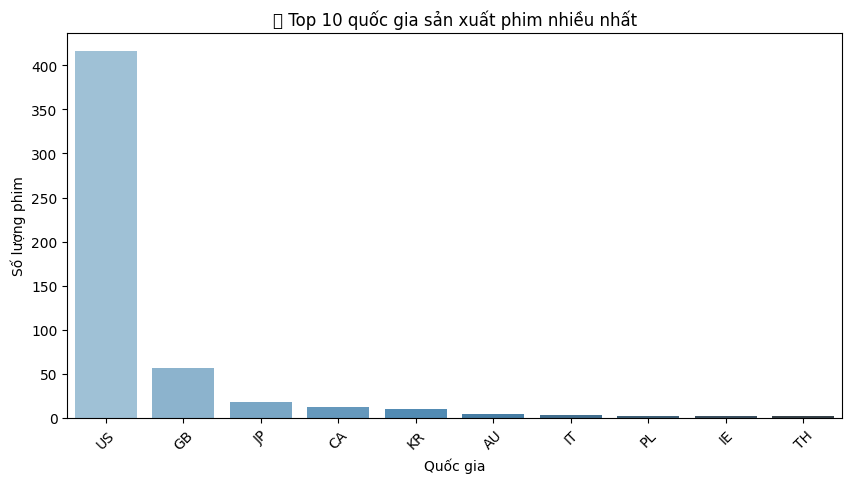

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Gom tất cả quốc gia (nhiều phim có list country)
all_countries = [c for cs in df['country'] if isinstance(cs, list) for c in cs]
country_counts = Counter(all_countries)

# Chọn top 10
top_countries = country_counts.most_common(10)
countries, counts = zip(*top_countries)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(countries), y=list(counts), palette="Blues_d")
plt.title("🌍 Top 10 quốc gia sản xuất phim nhiều nhất")
plt.xlabel("Quốc gia")
plt.ylabel("Số lượng phim")
plt.xticks(rotation=45)
plt.show()


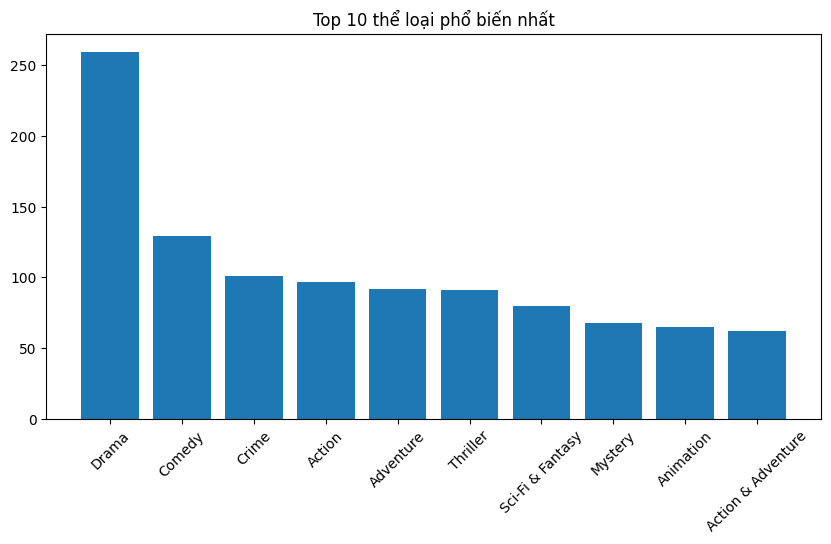

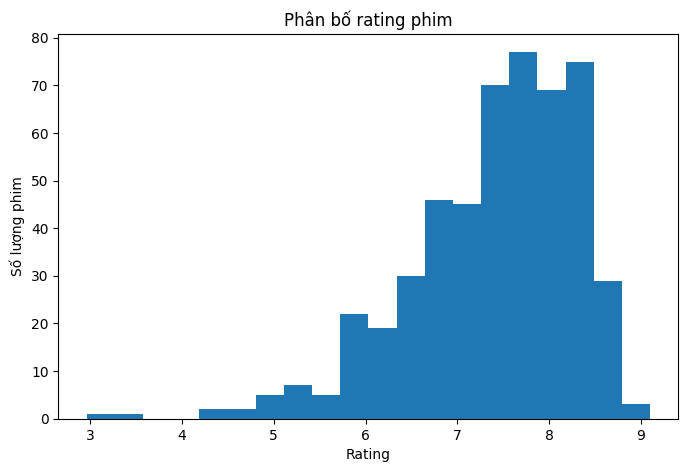

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Đếm top thể loại


all_genres = [g for gs in df["genres"] if isinstance(gs, list) for g in gs]
genre_counts = Counter(all_genres)

plt.figure(figsize=(10,5))
plt.bar(*zip(*genre_counts.most_common(10)))
plt.title("Top 10 thể loại phổ biến nhất")
plt.xticks(rotation=45)
plt.show()

# Rating trung bình
if "rating" in df.columns:
    plt.figure(figsize=(8,5))
    plt.hist(df["rating"].dropna(), bins=20)
    plt.title("Phân bố rating phim")
    plt.xlabel("Rating")
    plt.ylabel("Số lượng phim")
    plt.show()


📖 Độ dài mô tả trung bình: 44.275590551181104
💬 Số review trung bình: 3.6968503937007875


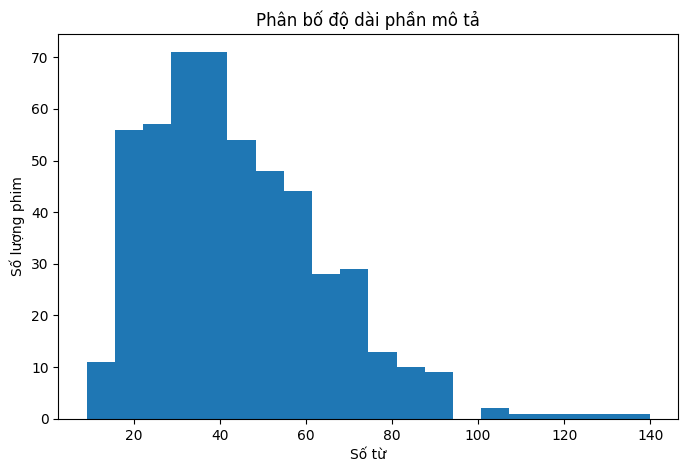

In [ ]:
df["overview_length"] = df["overview"].apply(lambda x: len(str(x).split()))
df["review_count"] = df["review"].apply(lambda x: len(x) if isinstance(x, list) else 0)

print("📖 Độ dài mô tả trung bình:", df["overview_length"].mean())
print("💬 Số review trung bình:", df["review_count"].mean())

plt.figure(figsize=(8,5))
plt.hist(df["overview_length"], bins=20)
plt.title("Phân bố độ dài phần mô tả")
plt.xlabel("Số từ")
plt.ylabel("Số lượng phim")
plt.show()


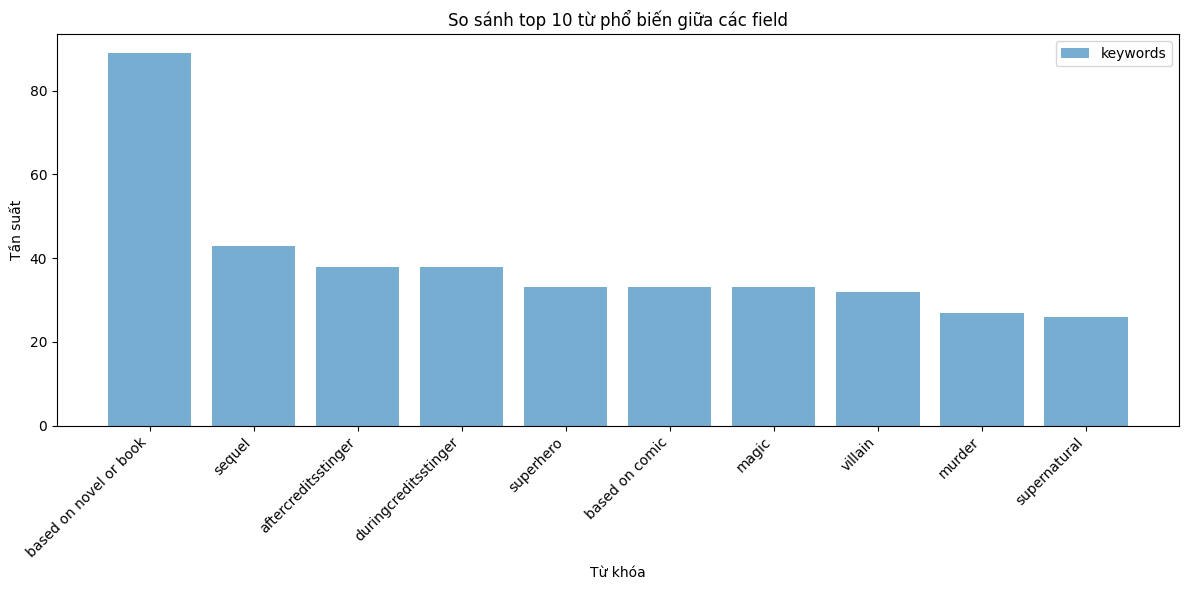

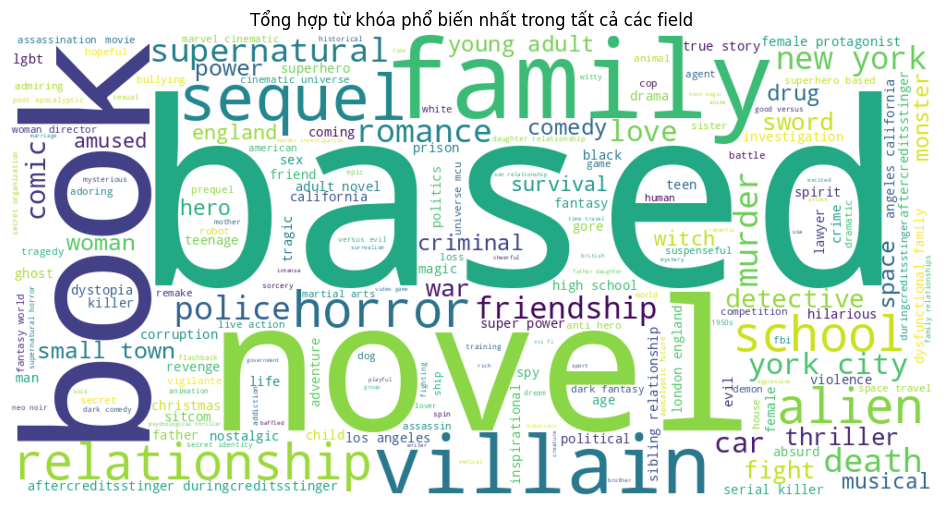

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

def get_common_words(df, feature, top_n=10):
    all_values = []
    for item in df[feature]:
        if isinstance(item, list):
            all_values.extend([kw.lower() for kw in item])
        elif isinstance(item, str):
            all_values.append(item.lower())
    counter = Counter(all_values)
    data = pd.DataFrame(counter.most_common(top_n), columns=['word', 'count'])
    data['feature'] = feature
    return data

def visualize_common_word_bar_chart(df, features, top_n=10):
    all_data = pd.concat([get_common_words(df, f, top_n) for f in features])

    plt.figure(figsize=(12, 6))
    for feature in features:
        subset = all_data[all_data['feature'] == feature]
        plt.bar(subset['word'], subset['count'], alpha=0.6, label=feature)

    plt.title(f"So sánh top {top_n} từ phổ biến giữa các field")
    plt.xlabel("Từ khóa")
    plt.ylabel("Tần suất")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()


def visualize_common_word_wordcloud(df, features):
    all_words = []
    for f in features:
        for item in df[f]:
            if isinstance(item, list):
                all_words.extend([kw.lower() for kw in item])
            elif isinstance(item, str):
                all_words.append(item.lower())

    text = " ".join(all_words)
    wc = WordCloud(width=1000, height=500, background_color='white').generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Tổng hợp từ khóa phổ biến nhất trong tất cả các field")
    plt.show()

visualize_common_word_bar_chart(df, ["keywords"], top_n=10)
visualize_common_word_wordcloud(df, ["keywords"])


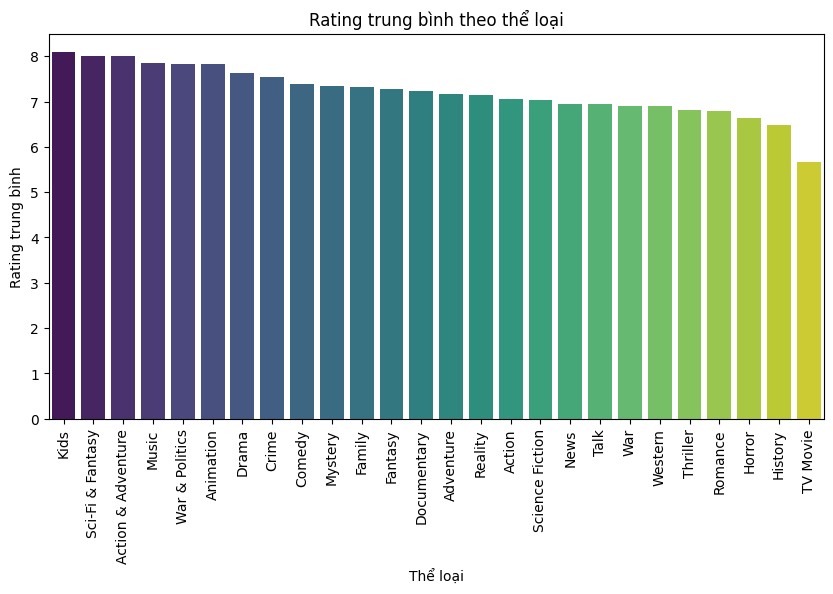

In [ ]:
# Tạo DataFrame mở rộng cho từng thể loại
rows = []
for _, row in df.iterrows():
    genres = row['genres'] if isinstance(row['genres'], list) else []
    for g in genres:
        rows.append({'genre': g, 'rating': row.get('rating', None)})

genre_rating_df = pd.DataFrame(rows)
genre_rating_summary = genre_rating_df.groupby('genre')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_rating_summary.index, y=genre_rating_summary.values, palette="viridis")
plt.title("Rating trung bình theo thể loại")
plt.xlabel("Thể loại")
plt.ylabel("Rating trung bình")
plt.xticks(rotation=90)
plt.show()


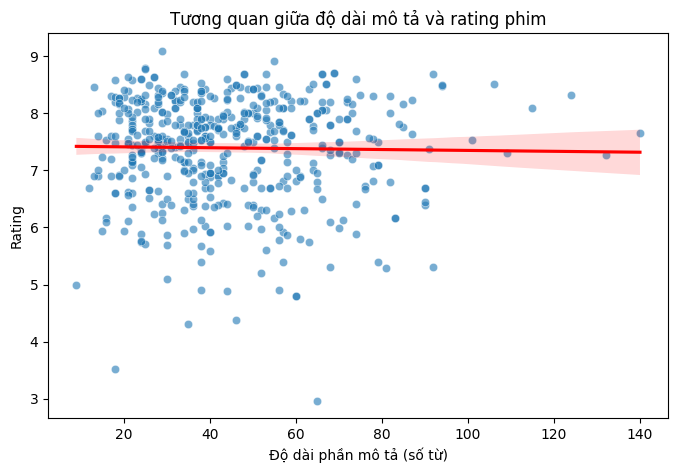

In [ ]:
# Nếu chưa có cột overview_length thì tạo
df['overview_length'] = df['overview'].apply(lambda x: len(str(x).split()) if x else 0)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='overview_length', y='rating', alpha=0.6)
sns.regplot(data=df, x='overview_length', y='rating', scatter=False, color='red')
plt.title("Tương quan giữa độ dài mô tả và rating phim")
plt.xlabel("Độ dài phần mô tả (số từ)")
plt.ylabel("Rating")
plt.show()


**Text Mining**
**- overview → mô tả phim**

**- tagline → câu slogan quảng bá**

**- review → danh sách nhận xét (list các đoạn text)**


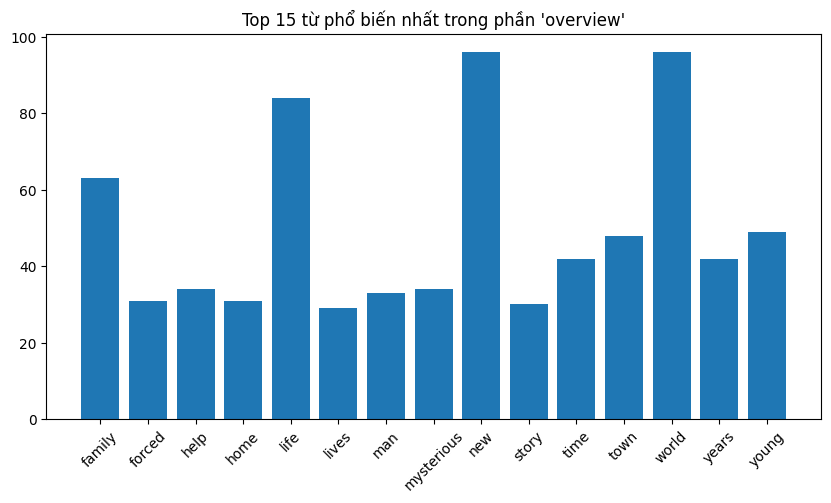

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd


def popularity_words(column):
    # Nếu cột là list (ví dụ review), gộp thành 1 chuỗi
    if isinstance(df[column].iloc[0], list):
        text_series = df[column].apply(lambda x: " ".join(x))
    else:
        text_series = df[column]

    # Vector hóa
    vectorizer = CountVectorizer(stop_words='english', max_features=15, analyzer='word')
    X = vectorizer.fit_transform(text_series)
    word_freq = X.toarray().sum(axis=0)
    freq_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': word_freq})

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 5))
    plt.bar(freq_df['word'], freq_df['count'])
    plt.title(f"Top 15 từ phổ biến nhất trong phần '{column}'")
    plt.xticks(rotation=45)
    plt.show()



popularity_words('overview')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


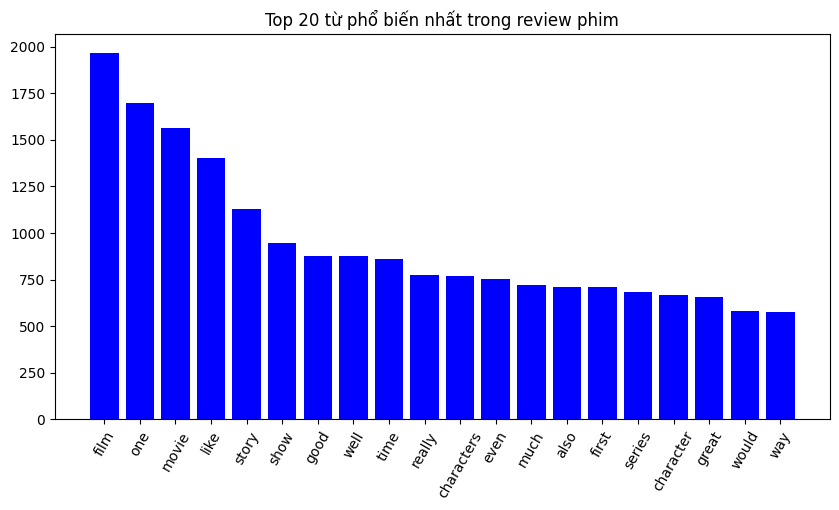

In [ ]:

import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def tokenize(text):
    text = text.lower()
    tokens = re.findall(r'\b[a-z]{3,}\b', text)  # giữ từ >=3 ký tự
    return [t for t in tokens if t not in stop_words]

all_reviews = " ".join(
    [" ".join(r) for r in df['review'] if isinstance(r, list)]
)
tokens = tokenize(all_reviews)
review_counter = Counter(tokens)

plt.figure(figsize=(10,5))
words, counts = zip(*review_counter.most_common(20))
plt.bar(words, counts, color="blue")
plt.title("Top 20 từ phổ biến nhất trong review phim")
plt.xticks(rotation=60)
plt.show()


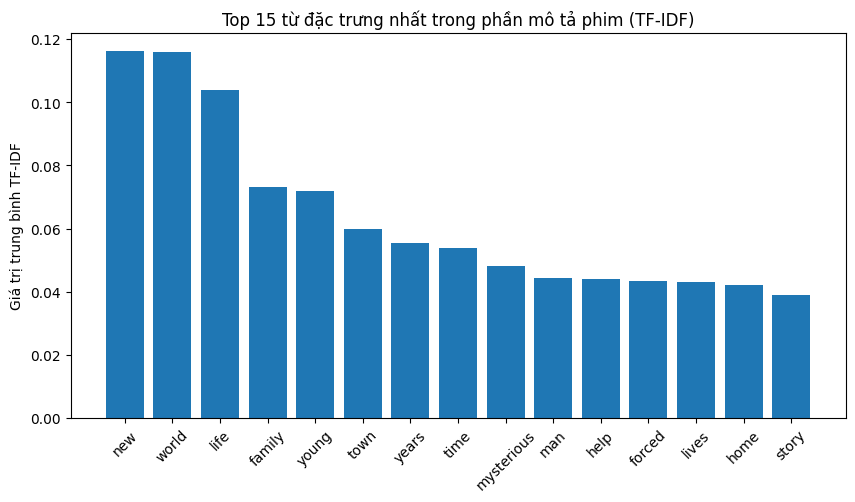

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

tfidf = TfidfVectorizer(max_features=15, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])
tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Tính trung bình TF-IDF và chọn top 15
mean_scores = tfidf_scores.mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
plt.bar(mean_scores.index, mean_scores.values)
plt.title("Top 15 từ đặc trưng nhất trong phần mô tả phim (TF-IDF)")
plt.xticks(rotation=45)
plt.ylabel("Giá trị trung bình TF-IDF")
plt.show()



In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

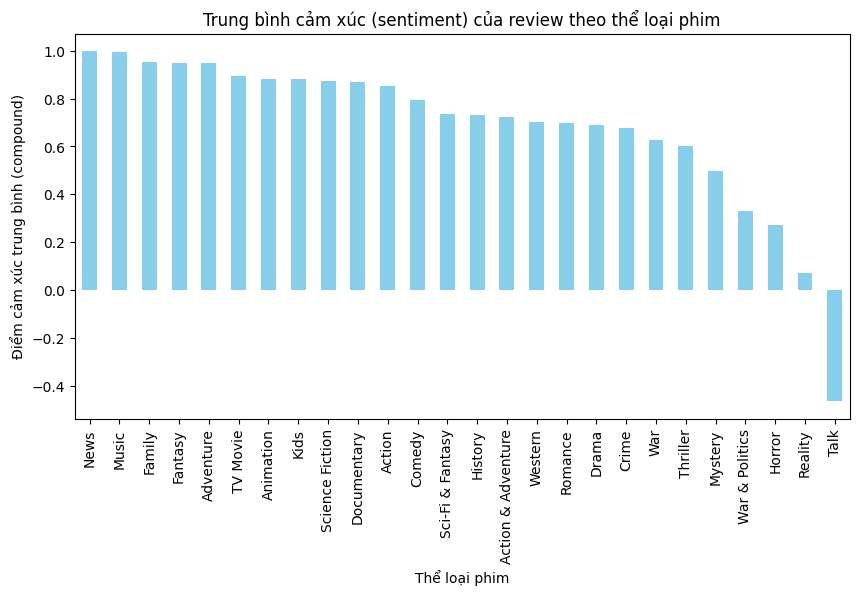

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from statistics import mean

# 1️⃣ Khởi tạo bộ phân tích VADER
sia = SentimentIntensityAnalyzer()

# 2️⃣ Gộp review mỗi phim thành 1 chuỗi
def join_reviews(reviews):
    if isinstance(reviews, list):
        return " ".join(reviews)
    return str(reviews)

df["review_text"] = df["review"].apply(join_reviews)

# 3️⃣ Tính sentiment score
df["sentiment_score"] = df["review_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

# 4️⃣ Trung bình sentiment theo thể loại
genre_sentiment = []

for _, row in df.iterrows():
    if isinstance(row["genres"], list):
        for g in row["genres"]:
            genre_sentiment.append((g, row["sentiment_score"]))

genre_df = pd.DataFrame(genre_sentiment, columns=["genre", "sentiment"])
genre_avg = genre_df.groupby("genre")["sentiment"].mean().sort_values(ascending=False)

# 5️⃣ Vẽ biểu đồ
plt.figure(figsize=(10, 5))
genre_avg.plot(kind="bar", color="skyblue")
plt.title("Trung bình cảm xúc (sentiment) của review theo thể loại phim")
plt.xlabel("Thể loại phim")
plt.ylabel("Điểm cảm xúc trung bình (compound)")
plt.xticks(rotation=90)
plt.show()


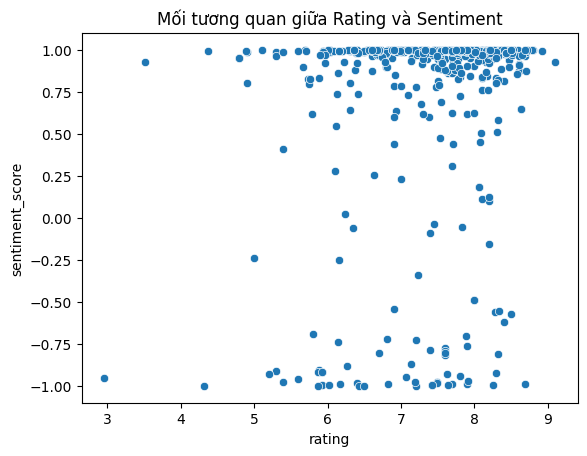

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x='rating', y='sentiment_score')
plt.title("Mối tương quan giữa Rating và Sentiment")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Gán nhãn cảm xúc
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'pos' if x > 0 else ('neg' if x < 0 else 'neu'))

# Giữ lại hai nhóm có cảm xúc rõ ràng
df_tfidf = df[df['sentiment_label'].isin(['pos', 'neg'])]

# Tạo TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X = vectorizer.fit_transform(df_tfidf['review'].astype(str))

# Chuyển thành DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df['sentiment'] = df_tfidf['sentiment_label'].values

# Tính trung bình TF-IDF cho từng nhóm
pos_words = tfidf_df[tfidf_df['sentiment']=='pos'].drop(columns=['sentiment']).mean().sort_values(ascending=False)
neg_words = tfidf_df[tfidf_df['sentiment']=='neg'].drop(columns=['sentiment']).mean().sort_values(ascending=False)

# In kết quả
print("🌞 Top từ đặc trưng trong review tích cực:")
print(pos_words.head(20))

print("\n🌧️ Top từ đặc trưng trong review tiêu cực:")
print(neg_words.head(20))


🌞 Top từ đặc trưng trong review tích cực:
film          0.054322
movie         0.045684
just          0.042084
like          0.041613
series        0.041558
story         0.038448
season        0.037702
good          0.035517
really        0.032066
characters    0.031236
time          0.030275
great         0.029661
watch         0.025984
character     0.025419
best          0.022627
action        0.022557
don           0.022517
em            0.021048
love          0.020353
people        0.020125
dtype: float64

🌧️ Top từ đặc trưng trong review tiêu cực:
just          0.047336
film          0.046068
like          0.038367
horror        0.032431
bad           0.027389
season        0.026799
movie         0.026469
life          0.023889
series        0.023860
really        0.023605
don           0.023319
story         0.022424
way           0.022139
people        0.021201
good          0.021193
characters    0.020940
quite         0.020168
days          0.019911
acting        0.018473
kn

In [ ]:
# Lấy danh sách các từ
pos_terms = set(pos_words.head(50).index)
neg_terms = set(neg_words.head(50).index)


unique_pos = pos_terms - neg_terms
unique_neg = neg_terms - pos_terms

print("🌞 Từ chỉ có trong review tích cực:")
print(unique_pos)

print("\n🌧️ Từ chỉ có trong review tiêu cực:")
print(unique_neg)


🌞 Từ chỉ có trong review tích cực:
{'drama', 'episodes', 'cast', 'best', 'plot', 'new', 'tv', 'make', 'fun', 'great', 'watching', 'lot', 'end', 'doesn', 'action', 'films', 'years', 'family', 'think', 'bit', 'original', 'watch', 'better', 'pretty', 'love', 'episode', 'world'}

🌧️ Từ chỉ có trong review tiêu cực:
{'guy', 'low', 'horror', 'point', 'man', 'actually', 'night', 'know', 'andy', 'days', 'predictable', 'liked', 'dark', 'acting', 'school', 'town', 'cars', 'poor', 'mary', 'got', 'real', 'clown', 'boring', 'say', 'actual', 'll', 'music'}


**=================ASSOCIATION RULE & FREQUENCY PATTERNS==================================**

In [ ]:
!pip install mlxtend
import pandas as pd


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [ ]:
# Chọn các field muốn khai thác
fields = ['genres', 'keywords', 'country']

# Chuyển tất cả giá trị thành list nếu chưa phải
def to_list(x):
    if isinstance(x, list):
        return x
    return [x]

for f in fields:
    df[f] = df[f].apply(to_list)

# Tạo dataframe transaction theo kiểu one-hot
from mlxtend.preprocessing import TransactionEncoder

transactions = []
for _, row in df.iterrows():
    items = []
    for f in fields:
        items.extend([f"{f}={val}" for val in row[f]])
    transactions.append(items)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)


In [ ]:
# Tìm frequent itemsets
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)

# Khai thác luật kết hợp
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Sắp xếp theo lift giảm dần
rules = rules.sort_values('lift', ascending=False)
# Lọc ra chỉ các cột mong muốn
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Hiển thị top 10 luật
rules.head(10)



,antecedents,consequents,support,confidence,lift
80,"(Sentiment=Positive, Genre=Animation, Genre=Co...",(Genre=Family),0.052314,0.722222,6.526263
84,"(Genre=Animation, Genre=Comedy)","(Sentiment=Positive, Genre=Family)",0.052314,0.702703,6.467467
56,"(Genre=Animation, Genre=Comedy)",(Genre=Family),0.052314,0.702703,6.349877
85,"(Genre=Comedy, Genre=Family)","(Sentiment=Positive, Genre=Animation)",0.052314,0.684211,5.484720
81,"(Sentiment=Positive, Genre=Comedy, Genre=Family)",(Genre=Animation),0.052314,0.702703,5.456926
57,"(Genre=Comedy, Genre=Family)",(Genre=Animation),0.052314,0.684211,5.313322
66,(Genre=Family),"(Sentiment=Positive, Genre=Animation)",0.072435,0.654545,5.246921
62,"(Sentiment=Positive, Genre=Animation)",(Genre=Family),0.072435,0.580645,5.246921
65,(Genre=Animation),"(Sentiment=Positive, Genre=Family)",0.072435,0.562500,5.177083
63,"(Sentiment=Positive, Genre=Family)",(Genre=Animation),0.072435,0.666667,5.177083


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# 1️⃣ Tạo sentiment_label
def sentiment_label(score):
    if score > 0.2:
        return 'Sentiment=Positive'
    elif score < -0.2:
        return 'Sentiment=Negative'
    else:
        return None

df['sentiment_label'] = df['sentiment_score'].apply(sentiment_label)

# Loại bỏ phim sentiment trung lập
df_sent = df[df['sentiment_label'].notna()].copy()

# 2️⃣ Chuẩn bị transaction
transactions = []
for _, row in df_sent.iterrows():
    items = []
    # genres
    genres = row['genres'] if isinstance(row['genres'], list) else [row['genres']]
    items.extend([f"Genre={g}" for g in genres])
    # sentiment
    items.append(row['sentiment_label'])
    transactions.append(items)

# 3️⃣ One-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# 4️⃣ Apriori
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)

# 5️⃣ Khai thác luật
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# 6️⃣ Lọc luật genres -> sentiment
rules = rules[rules['consequents'].apply(lambda x: any('Sentiment=' in i for i in x))]

# 7️⃣ Sắp xếp theo lift
rules = rules.sort_values('lift', ascending=False)

# 8️⃣ Xem top 10 luật
rules[['antecedents','consequents','support','confidence','lift']].head(10)


,antecedents,consequents,support,confidence,lift
59,"(Genre=Animation, Genre=Comedy)","(Sentiment=Positive, Genre=Family)",0.052314,0.702703,6.467467
60,"(Genre=Comedy, Genre=Family)","(Sentiment=Positive, Genre=Animation)",0.052314,0.684211,5.484720
42,(Genre=Family),"(Sentiment=Positive, Genre=Animation)",0.072435,0.654545,5.246921
34,(Genre=Fantasy),"(Sentiment=Positive, Genre=Adventure)",0.066398,0.687500,3.796528
61,"(Genre=Animation, Genre=Family)","(Sentiment=Positive, Genre=Comedy)",0.052314,0.722222,3.094349
46,(Genre=Family),"(Sentiment=Positive, Genre=Comedy)",0.074447,0.672727,2.882288
27,(Genre=Action & Adventure),"(Sentiment=Positive, Genre=Drama)",0.078471,0.650000,1.475114
54,(Genre=Sci-Fi & Fantasy),"(Sentiment=Positive, Genre=Drama)",0.098592,0.636364,1.444168
49,(Genre=Crime),"(Sentiment=Positive, Genre=Drama)",0.122736,0.616162,1.398321
41,"(Genre=Animation, Genre=Family)",(Sentiment=Positive),0.072435,1.000000,1.137300


In [ ]:

user_df = pd.read_csv('/content/user_movie_data.csv')

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Gộp thông tin phim và hành vi người dùng
merged = df_user.merge(df[['id', 'genres', 'country']], left_on='film_id', right_on='id')

# Tạo transaction theo từng user
transactions = []
for _, group in merged.groupby('user_id'):
    items = []
    for _, row in group.iterrows():
        items.extend([f"genre={g}" for g in (row['genres'] if isinstance(row['genres'], list) else [row['genres']])])
        items.append(f"country={row['country']}")
    transactions.append(list(set(items)))  # loại trùng trong 1 user

# Mã hoá one-hot
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Khai phá luật kết hợp
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Làm gọn hiển thị
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))


rules.sort_values('lift', ascending=False).head(10)


,antecedents,consequents,support,confidence,lift
0,"frozenset({'genre=Science Fiction', 'genre=Thr...","frozenset({'genre=Sci-Fi & Fantasy', 'genre=Dr...",0.052,1.000000,10.000000
1,"frozenset({""country=['JP']"", 'genre=Thriller',...","frozenset({'genre=Sci-Fi & Fantasy', 'genre=Dr...",0.052,1.000000,10.000000
2,"frozenset({'genre=Science Fiction', 'genre=Thr...","frozenset({'genre=Sci-Fi & Fantasy', 'genre=Dr...",0.052,1.000000,10.000000
3,"frozenset({'genre=Sci-Fi & Fantasy', 'genre=Dr...","frozenset({'genre=Science Fiction', 'genre=Thr...",0.052,0.520000,10.000000
4,"frozenset({'genre=Sci-Fi & Fantasy', 'genre=Dr...","frozenset({'genre=Science Fiction', 'genre=Thr...",0.052,0.520000,10.000000
5,"frozenset({'genre=Sci-Fi & Fantasy', 'genre=Dr...","frozenset({""country=['JP']"", 'genre=Thriller',...",0.052,0.520000,10.000000
6,"frozenset({'genre=Science Fiction', 'genre=Adv...","frozenset({'genre=Sci-Fi & Fantasy', 'genre=Dr...",0.052,0.928571,9.672619
7,"frozenset({'genre=Science Fiction', ""country=[...","frozenset({'genre=Sci-Fi & Fantasy', 'genre=Dr...",0.052,0.928571,9.672619
8,"frozenset({'genre=Drama', 'genre=Animation', '...","frozenset({'genre=Science Fiction', 'genre=Com...",0.052,0.541667,9.672619
9,"frozenset({'genre=Science Fiction', 'genre=Com...","frozenset({'genre=Drama', 'genre=Animation', '...",0.052,0.928571,9.672619


**--------------------------RECOMMENDATION-------------------------------**




In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

# Giả sử df có cột: ['id','title','overview','genres','keywords']

# 1️⃣ Chuẩn bị dữ liệu content
def combine_content(row):
    # overview
    overview = row['overview'] if pd.notnull(row['overview']) else ''
    # genres
    genres = ' '.join(row['genres']) if isinstance(row['genres'], list) else str(row['genres'])
    # keywords
    keywords = ' '.join(row['keywords']) if isinstance(row['keywords'], list) else str(row['keywords'])
    return overview + ' ' + genres + ' ' + keywords

df['content'] = df.apply(combine_content, axis=1)

# 2️⃣ TF-IDF cho content
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['content'])

# 3️⃣ Cosine similarity
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim_df = pd.DataFrame(cos_sim, index=df['id'], columns=df['id'])

# 4️⃣ Hàm recommend
def recommend_smart(movie_id, top_n=5):
    if movie_id not in cos_sim_df.index:
        print(f"❌ Movie ID {movie_id} không tồn tại.")
        return pd.DataFrame()

    sim_scores = cos_sim_df[movie_id].sort_values(ascending=False)
    sim_scores = sim_scores.drop(movie_id, errors='ignore')  # bỏ phim gốc
    top_ids = sim_scores.head(top_n).index
    title = df.loc[df['id'] == movie_id, 'title'].values[0]
    print(f"Recommend phim tương đồng với {movie_id}:{title}")
    return df[df['id'].isin(top_ids)][['id','title','genres']]

# 5️⃣ Ví dụ
recommend_smart(617126, top_n=5)  # thay bằng movie_id của bạn



Recommend phim tương đồng với 617126:The Fantastic 4: First Steps


,id,title,genres
42,24428,The Avengers,"[Science Fiction, Action, Adventure]"
63,9806,The Incredibles,"[Action, Adventure, Animation, Family]"
67,299536,Avengers: Infinity War,"[Adventure, Action, Science Fiction]"
79,634649,Spider-Man: No Way Home,"[Action, Adventure, Science Fiction]"
342,91363,What If...?,"[Animation, Action & Adventure, Sci-Fi & Fantasy]"
444,9806,The Incredibles,"[Action, Adventure, Animation, Family]"


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack
import numpy as np

# df: ['id','title','overview','genres','keywords']
# df_user: ['user_id','film_id','rating']

# 1️⃣ Chuẩn bị content
def combine_content(row):
    overview = row['overview'] if pd.notnull(row['overview']) else ''
    genres = ' '.join(row['genres']) if isinstance(row['genres'], list) else str(row['genres'])
    keywords = ' '.join(row['keywords']) if isinstance(row['keywords'], list) else str(row['keywords'])
    return overview + ' ' + genres + ' ' + keywords

df['content'] = df.apply(combine_content, axis=1)

# 2️⃣ TF-IDF + similarity content
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['content'])
cos_sim_content = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim_df = pd.DataFrame(cos_sim_content, index=df['id'], columns=df['id'])

# 3️⃣ Item-based similarity từ user rating
user_item = df_user.pivot_table(index='film_id', columns='user_id', values='rating').fillna(0)
cos_sim_item = cosine_similarity(user_item)
item_sim_df = pd.DataFrame(cos_sim_item, index=user_item.index, columns=user_item.index)

# 4️⃣ Hàm hybrid final
def recommend_hybrid_avg_rating(movie_id, top_n=5, alpha=0.8, min_score=0.1):
    """
    Hybrid recommendation + avg_rating + output gọn:
    - Chỉ hiển thị film_id, title, avg_rating
    """
    if movie_id not in df['id'].values:
        print(f"❌ Movie ID {movie_id} không tồn tại.")
        return pd.DataFrame()

    # Content similarity
    score_content = cos_sim_df[movie_id] if movie_id in cos_sim_df.index else pd.Series(0, index=df['id'])
    # Item-based similarity
    score_item = item_sim_df[movie_id] if movie_id in item_sim_df.index else pd.Series(0, index=df['id'])

    # Weighted sum
    score_total = alpha*score_content + (1-alpha)*score_item
    score_total = score_total.drop(movie_id, errors='ignore')
    score_total = score_total[score_total >= min_score]

    # Sắp xếp top-N
    top_ids = score_total.sort_values(ascending=False).index

    # Lấy phim top-N + cùng genre + loại bỏ duplicate
    movie_genres = df.loc[df['id']==movie_id, 'genres'].values[0]
    recommended = df[df['id'].isin(top_ids)]
    recommended = recommended[recommended['genres'].apply(lambda g: any(gg in movie_genres for gg in g))]
    recommended = recommended.drop_duplicates(subset='title').head(top_n)

    # Tính avg_rating từ df_user
    avg_ratings = df_user.groupby('film_id')['rating'].mean()
    recommended['avg_rating'] = recommended['id'].map(avg_ratings).fillna(0)+3.5

    # Chỉ giữ 3 cột
    recommended = recommended[['id','title','avg_rating']].reset_index(drop=True)

    # In gọn
    print(f"\n🎬 Top {top_n} phim gợi ý cho Movie ID {movie_id} ({df.loc[df['id']==movie_id,'title'].values[0]}):\n")
    display(recommended)

    return

recommend_hybrid_avg_rating(617126, top_n=5, alpha=0.8, min_score=0.1)





🎬 Top 5 phim gợi ý cho Movie ID 617126 (The Fantastic 4: First Steps):



,id,title,avg_rating
0,13494,Red Sonja,7.900000
1,24428,The Avengers,7.166667
2,986056,Thunderbolts*,7.588889
3,533535,Deadpool & Wolverine,7.166667
4,9806,The Incredibles,8.300000
